<a href="https://colab.research.google.com/github/Sayani-Das/Machine_learning_project/blob/main/Complete_Code_6_June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
## Data Ingestions step
df=pd.read_excel('/content/dt.xlsx')
df.head()

,PATIENT_ID,IL_6,BASOPHILS,PLATELET_COUNT,MONOCYTES,NEUTROPHIL,LYMPHOCYTES,D_Dimer,ESR,HS_CRP,Target_Variable
0,288,798.900000,0.100000,225.000000,4.000000,93.800000,2.100000,21.000000,94.000000,63.000000,1
1,306,789.039065,0.095264,218.654299,3.938437,93.648461,2.308366,20.197941,90.590370,62.713873,1
2,290,780.383729,0.100000,214.654676,3.795571,94.078766,1.988494,21.000000,90.338720,71.939103,1
3,676,590.670000,0.000000,91.000000,2.700000,90.600000,6.500000,4.063195,22.000000,56.957961,1
4,527,585.010000,0.200000,112.000000,3.500000,74.400000,21.800000,4.063195,36.039968,69.740000,0


In [ ]:
df.isnull().sum()

PATIENT_ID         0
IL_6               0
BASOPHILS          0
PLATELET_COUNT     0
MONOCYTES          0
NEUTROPHIL         0
LYMPHOCYTES        0
D_Dimer            0
ESR                0
HS_CRP             0
Target_Variable    0
dtype: int64

In [ ]:
### No missing values present in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PATIENT_ID       1570 non-null   int64  
 1   IL_6             1570 non-null   float64
 2   BASOPHILS        1570 non-null   float64
 3   PLATELET_COUNT   1570 non-null   float64
 4   MONOCYTES        1570 non-null   float64
 5   NEUTROPHIL       1570 non-null   float64
 6   LYMPHOCYTES      1570 non-null   float64
 7   D_Dimer          1570 non-null   float64
 8   ESR              1570 non-null   float64
 9   HS_CRP           1570 non-null   float64
 10  Target_Variable  1570 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 135.0 KB


In [ ]:
## Lets drop the id column
df=df.drop(labels=['PATIENT_ID'],axis=1)
df.head()

,IL_6,BASOPHILS,PLATELET_COUNT,MONOCYTES,NEUTROPHIL,LYMPHOCYTES,D_Dimer,ESR,HS_CRP,Target_Variable
0,798.900000,0.100000,225.000000,4.000000,93.800000,2.100000,21.000000,94.000000,63.000000,1
1,789.039065,0.095264,218.654299,3.938437,93.648461,2.308366,20.197941,90.590370,62.713873,1
2,780.383729,0.100000,214.654676,3.795571,94.078766,1.988494,21.000000,90.338720,71.939103,1
3,590.670000,0.000000,91.000000,2.700000,90.600000,6.500000,4.063195,22.000000,56.957961,1
4,585.010000,0.200000,112.000000,3.500000,74.400000,21.800000,4.063195,36.039968,69.740000,0


In [ ]:
## check for duplicated records
df.duplicated().sum()

2

In [ ]:
df[df.duplicated()]

,IL_6,BASOPHILS,PLATELET_COUNT,MONOCYTES,NEUTROPHIL,LYMPHOCYTES,D_Dimer,ESR,HS_CRP,Target_Variable
785,43.495173,0.5,207.0,11.7,73.5,11.3,4.063195,36.039968,56.957961,0
1212,17.490000,0.4,92.0,7.1,51.5,41.0,0.220000,21.000000,27.900000,0


In [ ]:
# Remove Duplicate Rows
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(1568, 10)

In [ ]:
df.corr()

,IL_6,BASOPHILS,PLATELET_COUNT,MONOCYTES,NEUTROPHIL,LYMPHOCYTES,D_Dimer,ESR,HS_CRP,Target_Variable
IL_6,1.000000,-0.106750,-0.162800,-0.265315,0.308203,-0.291639,0.239990,0.072605,0.273348,0.322145
BASOPHILS,-0.106750,1.000000,0.058739,0.129515,-0.194461,0.172128,0.014138,0.010819,-0.127409,-0.105610
PLATELET_COUNT,-0.162800,0.058739,1.000000,0.293314,-0.314098,0.280955,-0.429762,0.198972,-0.314939,-0.408919
MONOCYTES,-0.265315,0.129515,0.293314,1.000000,-0.749135,0.614105,-0.426888,-0.125458,-0.441037,-0.538638
NEUTROPHIL,0.308203,-0.194461,-0.314098,-0.749135,1.000000,-0.966084,0.514847,0.194766,0.549944,0.708361
LYMPHOCYTES,-0.291639,0.172128,0.280955,0.614105,-0.966084,1.000000,-0.493681,-0.203000,-0.520977,-0.683744
D_Dimer,0.239990,0.014138,-0.429762,-0.426888,0.514847,-0.493681,1.000000,-0.009094,0.382489,0.557334
ESR,0.072605,0.010819,0.198972,-0.125458,0.194766,-0.203000,-0.009094,1.000000,0.295646,0.084280
HS_CRP,0.273348,-0.127409,-0.314939,-0.441037,0.549944,-0.520977,0.382489,0.295646,1.000000,0.546655
Target_Variable,0.322145,-0.105610,-0.408919,-0.538638,0.708361,-0.683744,0.557334,0.084280,0.546655,1.000000


In [ ]:
numerical_columns=df.columns[df.dtypes!='object']
print("Numerical columns:",numerical_columns)

Numerical columns: Index(['IL_6', 'BASOPHILS', 'PLATELET_COUNT', 'MONOCYTES', 'NEUTROPHIL',
       'LYMPHOCYTES', 'D_Dimer', 'ESR', 'HS_CRP', 'Target_Variable'],
      dtype='object')


<Axes: >

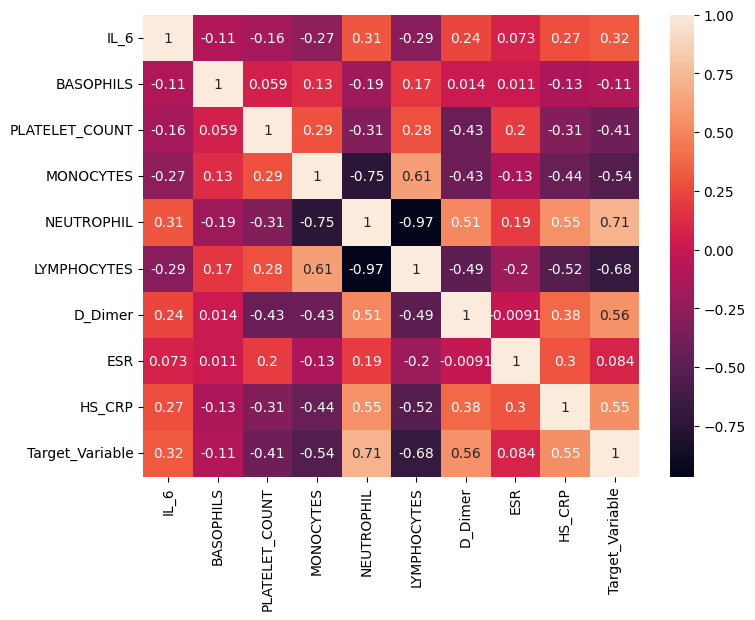

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True)

In [ ]:
df.describe()

,IL_6,BASOPHILS,PLATELET_COUNT,MONOCYTES,NEUTROPHIL,LYMPHOCYTES,D_Dimer,ESR,HS_CRP,Target_Variable
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,59.526675,0.296190,178.020658,6.075341,76.981927,16.063264,6.622591,36.728890,79.192270,0.503189
std,83.374740,0.462102,95.857562,3.757571,16.074234,12.803884,8.101488,20.537745,72.112093,0.500149
min,0.980000,0.000000,4.000000,0.460000,1.700000,0.300000,0.050000,1.000000,0.100000,0.000000
25%,22.187500,0.100000,114.000000,3.017225,64.175000,5.000000,0.663725,25.600842,33.001350,0.000000
50%,43.495173,0.200000,169.378223,5.524537,81.208753,12.367290,4.063195,36.039968,56.957961,1.000000
75%,58.481091,0.300000,228.250000,8.200000,91.408807,25.500000,9.973288,39.757722,99.125253,1.000000
max,798.900000,8.630000,594.000000,35.200000,98.300000,64.200000,80.000000,141.000000,320.000000,1.000000


In [ ]:
## Independent and dependent features
X = df.drop(labels=['Target_Variable'],axis=1)
Y = df[['Target_Variable']]

In [ ]:
numerical_cols = X.select_dtypes(exclude='object').columns

In [ ]:
numerical_cols


Index(['IL_6', 'BASOPHILS', 'PLATELET_COUNT', 'MONOCYTES', 'NEUTROPHIL',
       'LYMPHOCYTES', 'D_Dimer', 'ESR', 'HS_CRP'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

In [ ]:
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols)
])

In [ ]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=30)

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report, f1_score, roc_curve, auc
import pandas as pd
import numpy as nP
import matplotlib.pyplot as plt

In [ ]:
# Training model using Random Forest Classifier Algorithm
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Predicting the Test Set Results
y_pred = logistic_regression.predict(X_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix : \n", cm)


Confusion matrix : 
 [[135  18]
 [ 29 132]]


In [ ]:
# Apply k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logistic_regression, X = X_train, y = y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print('\nAccuracy of each fold - ', accuracies,'\nMean Accuracy - %.3f' % mean,'\nVariance - %.3f' % variance )


Accuracy of each fold -  [0.89641434 0.87649402 0.88844622 0.88844622 0.864     ] 
Mean Accuracy - 0.883 
Variance - 0.011


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
# Evaluating performance metrics like Precision, Recall, F1 Score etc.
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, y_pred, average="macro")
print("\nPrecision:", precision,"\tRecall:", recall,"\tF1 score:",fbeta_score,"Support:",support)
accuracy = accuracy_score(y_test, y_pred)*100
print("\nAccuracy:", round(accuracy, 2), "%")
classificationReport = classification_report(y_test, y_pred)
print("\nClassification Report:\n ", classificationReport)


Precision: 0.8515853658536585 	Recall: 0.851114358786993 	F1 score: 0.8503048069218051 Support: None

Accuracy: 85.03 %

Classification Report:
                precision    recall  f1-score   support

           0       0.82      0.88      0.85       153
           1       0.88      0.82      0.85       161

    accuracy                           0.85       314
   macro avg       0.85      0.85      0.85       314
weighted avg       0.85      0.85      0.85       314



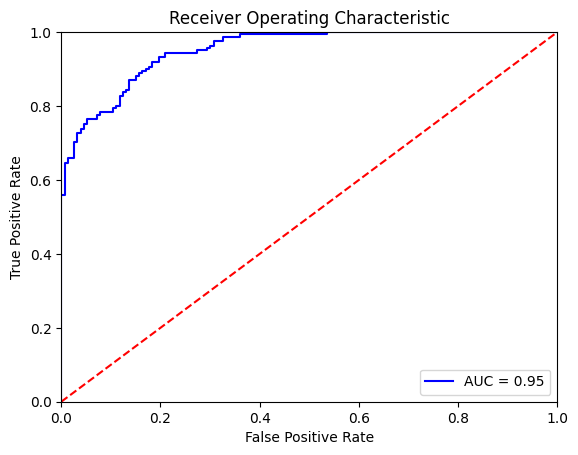

In [ ]:
# ROC Curve & AUC for Classification Model
probs = logistic_regression.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
sns.displot(numerical_cols['IL_6'])

IndexError: ignored

<ipython-input-30-5073f881fd34>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


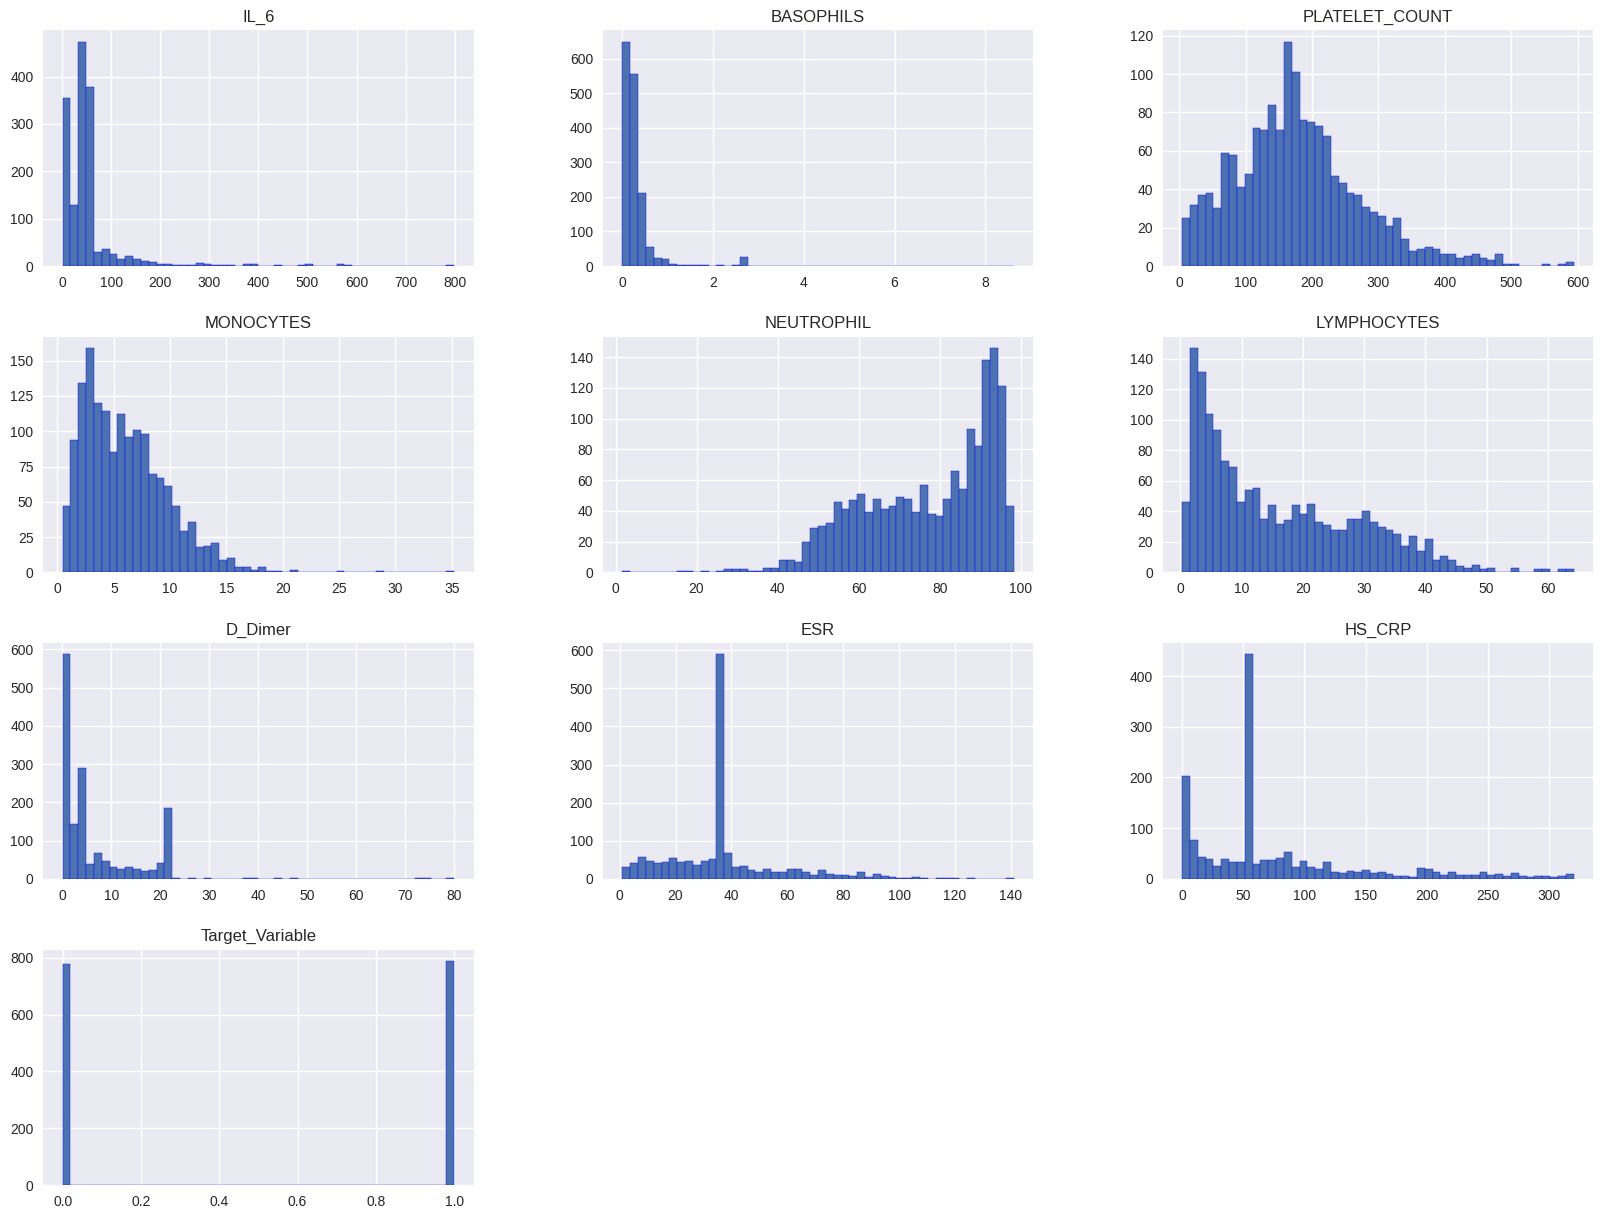

In [ ]:
# PLot density plot for all features
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [ ]:
percentage = df['Discharge_Method'].value_counts(normalize=True)*100
percentage

In [ ]:
#plotting PieChart
classeslabels = ["Survival", "Death"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

In [ ]:
ax = sns.boxplot(df['IL_6'], color= 'red')

In [ ]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)



    return X_train_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [ ]:
X_train_scaled

array([[-6.61305843e-01,  4.97819398e+00,  2.17522761e-01, ...,
        -3.06713361e-01, -5.12134232e-02, -3.02066341e-01],
       [-1.91078155e-01, -1.76618591e-03,  3.42184239e-01, ...,
        -7.87329503e-01, -5.12134232e-02, -1.08189212e+00],
       [ 5.24805105e-02, -4.11572871e-01, -1.18522164e+00, ...,
         1.64211177e+00, -3.56224086e-01, -1.32159744e-01],
       ...,
       [-1.06001882e-02, -2.06669529e-01,  5.99081967e-02, ...,
        -7.39308270e-01, -1.21893991e+00, -4.70707885e-01],
       [-1.91078155e-01, -2.06669529e-01, -2.43277182e-01, ...,
        -7.93648086e-01, -5.12134232e-02, -1.06930480e+00],
       [-1.06001882e-02, -1.76618591e-03, -4.73279884e-01, ...,
        -5.62387940e-01, -1.06704740e-01,  1.23417445e+00]])

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [ ]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
clf.best_score_

0.8851492063492064

In [ ]:
y_pred = clf.predict(X_test_scaled)

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[136,  17],
       [ 30, 131]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8503184713375797

In [ ]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8888888888888888

In [ ]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8192771084337349

In [ ]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8526645768025078

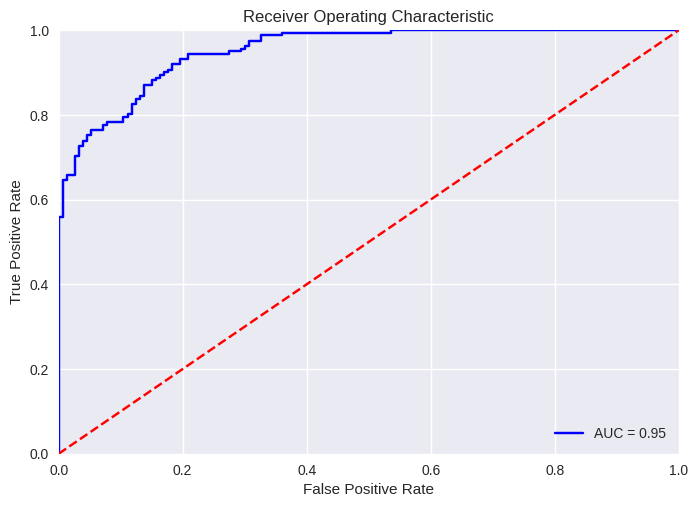

In [ ]:
# ROC Curve & AUC for Classification Model
probs = logistic_regression.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
kneighbors_classifier = KNeighborsClassifier()
kneighbors_classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
pred_logreg = logistic_regression.predict_proba(X_test_scaled)[:, 1]

In [ ]:
pred_logreg

array([9.35004850e-01, 9.12989420e-01, 1.95545241e-01, 7.27641993e-03,
       9.97496342e-01, 9.34369001e-01, 2.38998766e-01, 5.47531494e-01,
       3.16000585e-01, 9.95120670e-01, 3.08722939e-02, 5.34243664e-01,
       1.61088456e-02, 3.97448522e-01, 9.94037708e-01, 9.97428476e-01,
       7.87733763e-03, 9.66806379e-01, 4.48079281e-01, 9.73946746e-01,
       1.68160516e-01, 1.57395917e-01, 2.07422029e-01, 9.99213405e-01,
       9.74812969e-01, 9.90272976e-01, 5.47813695e-01, 1.75745255e-02,
       9.93411509e-01, 9.46589762e-01, 7.71153759e-02, 6.33951886e-02,
       2.29807709e-01, 9.98966987e-01, 7.29354496e-03, 2.55697708e-01,
       8.50452442e-02, 2.74710311e-02, 9.99096773e-01, 9.95458632e-01,
       4.94297461e-02, 9.99948335e-01, 9.64883769e-01, 3.50818130e-02,
       8.29967921e-03, 7.53095504e-01, 6.15113213e-01, 5.82624146e-01,
       2.57143096e-01, 3.54329742e-01, 1.21258017e-01, 2.27108919e-01,
       3.12824978e-02, 7.95745276e-01, 9.91103903e-01, 2.70906722e-02,
      

In [ ]:
pred_random = random_forest_classifier.predict_proba(X_test_scaled)[:, 1]

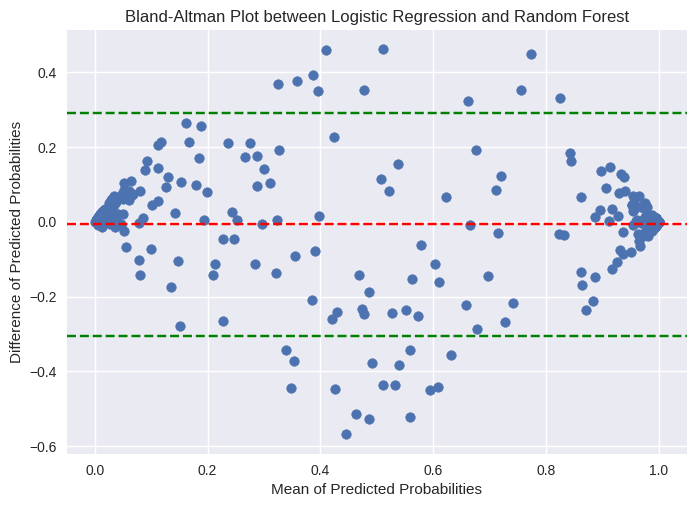

<Figure size 800x550 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = pred_logreg
data2 = pred_random
def bland_altman_plot(data1, data2, title):
    # Compute the differences and the means
    diff = data1 - data2
    mean = (data1 + data2) / 2

    # Compute the limits of agreement (mean ± 1.96 * standard deviation of differences)
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    # Create the Bland-Altman plot
    plt.scatter(mean, diff)
    plt.axhline(mean_diff, color='red', linestyle='--')
    plt.axhline(lower_limit, color='green', linestyle='--')
    plt.axhline(upper_limit, color='green', linestyle='--')
    plt.xlabel('Mean of Predicted Probabilities')
    plt.ylabel('Difference of Predicted Probabilities')
    plt.title(title)
    plt.show()

# Example usage
# Assuming you have trained logistic regression and random forest models named logreg_model and rf_model
# And you have a dataset named X_test on which you want to compare the predictions

# Perform Bland-Altman analysis
bland_altman_plot(pred_logreg, pred_random, 'Bland-Altman Plot between Logistic Regression and Random Forest')
plt.savefig('LR and RF.png')

In [ ]:
pred_decision = decision_tree_classifier.predict_proba(X_test_scaled)[:, 1]

In [ ]:
pred_kneigbors = kneighbors_classifier.predict_proba(X_test)[:, 1]

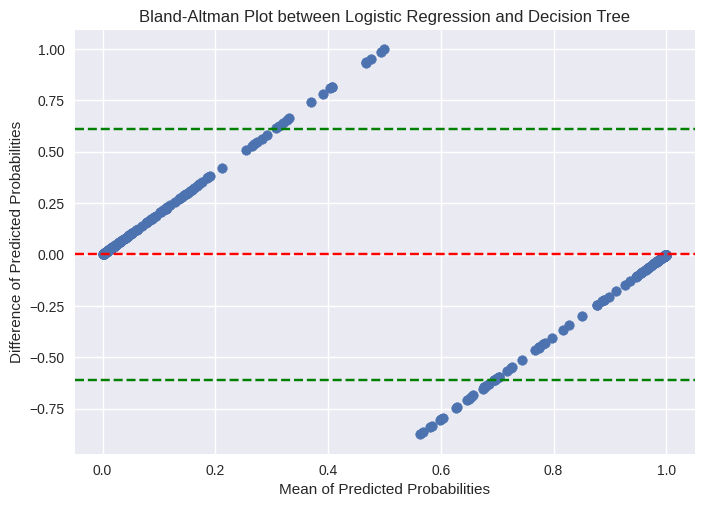

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = pred_logreg
data2 = pred_decision
def bland_altman_plot(data1, data2, title):
    # Compute the differences and the means
    diff = data1 - data2
    mean = (data1 + data2) / 2

    # Compute the limits of agreement (mean ± 1.96 * standard deviation of differences)
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    # Create the Bland-Altman plot
    plt.scatter(mean, diff)
    plt.axhline(mean_diff, color='red', linestyle='--')
    plt.axhline(lower_limit, color='green', linestyle='--')
    plt.axhline(upper_limit, color='green', linestyle='--')
    plt.xlabel('Mean of Predicted Probabilities')
    plt.ylabel('Difference of Predicted Probabilities')
    plt.title(title)
    plt.show()

# Example usage
# Assuming you have trained logistic regression and random forest models named logreg_model and rf_model
# And you have a dataset named X_test on which you want to compare the predictions

# Perform Bland-Altman analysis
bland_altman_plot(pred_logreg, pred_decision, 'Bland-Altman Plot between Logistic Regression and Decision Tree')

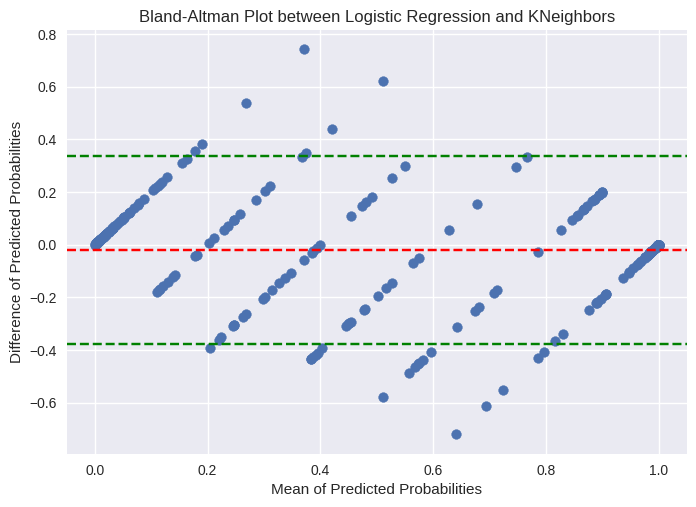

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = pred_logreg
data2 = pred_kneigbors

def bland_altman_plot(data1, data2, title):
    # Compute the differences and the means
    diff = data1 - data2
    mean = (data1 + data2) / 2

    # Compute the limits of agreement (mean ± 1.96 * standard deviation of differences)
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    # Create the Bland-Altman plot
    plt.scatter(mean, diff)
    plt.axhline(mean_diff, color='red', linestyle='--')
    plt.axhline(lower_limit, color='green', linestyle='--')
    plt.axhline(upper_limit, color='green', linestyle='--')
    plt.xlabel('Mean of Predicted Probabilities')
    plt.ylabel('Difference of Predicted Probabilities')
    plt.title(title)
    plt.show()
# Perform Bland-Altman analysis
bland_altman_plot(pred_logreg, pred_kneigbors, 'Bland-Altman Plot between Logistic Regression and KNeighbors')

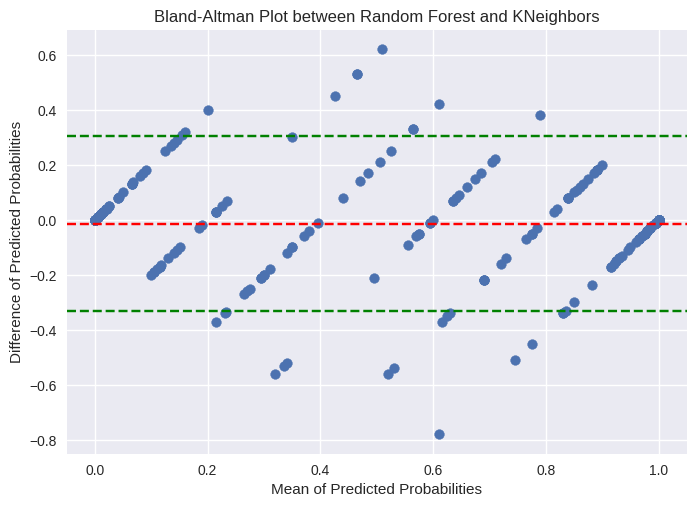

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = pred_random
data2 = pred_kneigbors
def bland_altman_plot(data1, data2, title):
    # Compute the differences and the means
    diff = data1 - data2
    mean = (data1 + data2) / 2

    # Compute the limits of agreement (mean ± 1.96 * standard deviation of differences)
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    # Create the Bland-Altman plot
    plt.scatter(mean, diff)
    plt.axhline(mean_diff, color='red', linestyle='--')
    plt.axhline(lower_limit, color='green', linestyle='--')
    plt.axhline(upper_limit, color='green', linestyle='--')
    plt.xlabel('Mean of Predicted Probabilities')
    plt.ylabel('Difference of Predicted Probabilities')
    plt.title(title)
    plt.show()


# Perform Bland-Altman analysis
bland_altman_plot(pred_random, pred_kneigbors, 'Bland-Altman Plot between Random Forest and KNeighbors')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = pred_random
data2 = pred_decision
def bland_altman_plot(data1, data2, title):
    # Compute the differences and the means
    diff = data1 - data2
    mean = (data1 + data2) / 2

    # Compute the limits of agreement (mean ± 1.96 * standard deviation of differences)
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    # Create the Bland-Altman plot
    plt.scatter(mean, diff)
    plt.axhline(mean_diff, color='red', linestyle='--')
    plt.axhline(lower_limit, color='green', linestyle='--')
    plt.axhline(upper_limit, color='green', linestyle='--')
    plt.xlabel('Mean of Predicted Probabilities')
    plt.ylabel('Difference of Predicted Probabilities')
    plt.title(title)
    plt.show()



# Perform Bland-Altman analysis
bland_altman_plot(pred_random, pred_decision, 'Bland-Altman Plot between Random Forest and Decision Tree')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = pred_decision
data2 = pred_kneigbors
def bland_altman_plot(data1, data2, title):
    # Compute the differences and the means
    diff = data1 - data2
    mean = (data1 + data2) / 2

    # Compute the limits of agreement (mean ± 1.96 * standard deviation of differences)
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    # Create the Bland-Altman plot
    plt.scatter(mean, diff)
    plt.axhline(mean_diff, color='red', linestyle='--')
    plt.axhline(lower_limit, color='green', linestyle='--')
    plt.axhline(upper_limit, color='green', linestyle='--')
    plt.xlabel('Mean of Predicted Probabilities')
    plt.ylabel('Difference of Predicted Probabilities')
    plt.title(title)
    plt.show()


# Perform Bland-Altman analysis
bland_altman_plot(pred_decision, pred_kneigbors, 'Bland-Altman Plot between Decision Tree and KNeighbors')